In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

In [8]:
print('code initiated')
# Constants
g = 9.81  # gravity
# Parameters
L1, L2 = 1.0, 2.0  # lengths of pendulums
m1, m2 = 1.0, 2.0  # masses
dt = 0.001         # time step
T = 100            # total simulation time
# Initial conditions: [theta1, dtheta1, theta2, dthate2] the initial condition is both pendulum are lifted with half pi angle 
state = np.array([np.pi / 2, 0.0, np.pi / 2, 0.0])

print("Initial state: ", state)
def theta_derivatives(state):
    theta_1, dtheta_1, theta_2, dtheta_2 = state
    delta_theta = theta_1 - theta_2
    M = m1 + m2
    alpha = M - m2 * np.cos(delta_theta)**2
    # Equation (6)and (7) from the link
    eq6 = (-m2 * L2 * dtheta_2**2 * np.sin(delta_theta)
            - m2 * L1 * dtheta_1**2 * np.sin(delta_theta) * np.cos(delta_theta)
            - M * g * np.sin(theta_1)
            + m2 * g * np.sin(theta_2) * np.cos(delta_theta))
    ddottheta_1_dt = eq6 / (L1 * alpha)

    eq7 = (+M * L1 * dtheta_1**2 * np.sin(delta_theta)
            - m2 * L2 * dtheta_2**2 * np.sin(delta_theta) * np.cos(delta_theta)
            + M * g * np.sin(theta_1) * np.cos(delta_theta)
            - M * g * np.sin(theta_2))
    ddottheta2_dt = eq7 / (L2 * alpha)

    return np.array([dtheta_1, ddottheta_1_dt, dtheta_2, ddottheta2_dt])


# Runge-Kutta from previous project
def rk2_step(state, dt):
    k1 = theta_derivatives(state)
    mid_state = state + 0.5 * dt * k1
    k2 = theta_derivatives(mid_state)
    return state + dt * k2

states = [state.copy()]
t = 0
while t < T:
    state = rk2_step(state, dt)
    states.append(state.copy())
    t += dt
    if round((t*100) % 200, 2) == 0:  # Every other second
        print(f"Simulated t = {t:.2f} seconds")


states = np.array(states)
theta1_vals = states[:, 0]
theta2_vals = states[:, 2]

x1 = L1 * np.sin(theta1_vals)
y1 = -L1 * np.cos(theta1_vals)
x2 = x1 + L2 * np.sin(theta2_vals)
y2 = y1 - L2 * np.cos(theta2_vals)

print('all done')

code initiated
Initial state:  [1.57079633 0.         1.57079633 0.        ]
Simulated t = 6.00 seconds
Simulated t = 8.00 seconds
Simulated t = 20.00 seconds
Simulated t = 22.00 seconds
Simulated t = 24.00 seconds
Simulated t = 26.00 seconds
Simulated t = 28.00 seconds
Simulated t = 30.00 seconds
Simulated t = 32.00 seconds
Simulated t = 34.00 seconds
Simulated t = 36.00 seconds
Simulated t = 38.00 seconds
Simulated t = 78.00 seconds
Simulated t = 80.00 seconds
Simulated t = 82.00 seconds
Simulated t = 84.00 seconds
Simulated t = 86.00 seconds
Simulated t = 88.00 seconds
Simulated t = 90.00 seconds
Simulated t = 92.00 seconds
Simulated t = 94.00 seconds
Simulated t = 96.00 seconds
Simulated t = 98.00 seconds
Simulated t = 100.00 seconds
all done


In [9]:
# state = np.array([np.pi / 2, 0.0, np.pi / 2, 0.0])
# print(state)


def theta_derivatives(state, L1, L2, m1, m2, g=9.81):
    theta_1, dtheta_1, theta_2, dtheta_2 = state
    delta_theta = theta_1 - theta_2
    M = m1 + m2
    alpha = M - m2 * np.cos(delta_theta)**2
    # Equation (6)and (7) from the link
    eq6 = (-m2 * L2 * dtheta_2**2 * np.sin(delta_theta)
            - m2 * L1 * dtheta_1**2 * np.sin(delta_theta) * np.cos(delta_theta)
            - M * g * np.sin(theta_1)
            + m2 * g * np.sin(theta_2) * np.cos(delta_theta))
    ddottheta_1_dt = eq6 / (L1 * alpha)

    eq7 = (+M * L1 * dtheta_1**2 * np.sin(delta_theta)
            - m2 * L2 * dtheta_2**2 * np.sin(delta_theta) * np.cos(delta_theta)
            + M * g * np.sin(theta_1) * np.cos(delta_theta)
            - M * g * np.sin(theta_2))
    ddottheta2_dt = eq7 / (L2 * alpha)

    return np.array([dtheta_1, ddottheta_1_dt, dtheta_2, ddottheta2_dt])

#tracking

# Runge-Kutta from previous project
def rk2_step(state, dt, L1, L2, m1, m2):
    k1 = theta_derivatives(state, L1, L2, m1, m2)
    mid_state = state + 0.5 * dt * k1
    k2 = theta_derivatives(mid_state, L1, L2, m1, m2)
    return state + dt * k2

# states = [state.copy()]
# t = 0
# while t < T:
#     state = rk2_step(state, dt)
#     states.append(state.copy())
#     t += dt

# states = np.array(states)
# theta1_vals = states[:, 0]
# theta2_vals = states[:, 2]

# x1 = L1 * np.sin(theta1_vals)
# y1 = -L1 * np.cos(theta1_vals)
# x2 = x1 + L2 * np.sin(theta2_vals)
# y2 = y1 - L2 * np.cos(theta2_vals)

def double_pendulum(dt, T, d0=0, g=9.81, L1=1.0, L2=2.0, m1=1.0, m2=2.0):
    """
    Inputs: 
            dt = timestep
            T = total runtime of simulation
            d0 = top pendulum's displacement from the horizontal (initial separation vector used for Lyapunov calculation)
            g = gravity (9.8 m/s2)
            L1, L2 = lengths of top and bottom pendulums respectively
            m1, m2 = masses of top and bottom pendulums respectively

    Outputs:
            states = array of angular positions and velocities of each pendulum over each timestep
            theta1_vals / theta2_vals = array of angular positions of each pendulum over each timestep
    """

    
    # Initial conditions: [theta1, dtheta1, theta2, dthate2] the initial condition is both pendulum are lifted with half pi angle
    state = np.array([np.pi / 2 + d0, 0.0, np.pi / 2, 0.0])
    # print(state)
    
    theta_derivatives(state, L1, L2, m1, m2)
    states = [state.copy()]
    t = 0
    while t < T:
        state = rk2_step(state, dt, L1, L2, m1, m2)
        states.append(state.copy())
        t += dt
    
    states = np.array(states)
    theta1_vals = states[:, 0]
    theta2_vals = states[:, 2]
    
    x1 = L1 * np.sin(theta1_vals)
    y1 = -L1 * np.cos(theta1_vals)
    x2 = x1 + L2 * np.sin(theta2_vals)
    y2 = y1 - L2 * np.cos(theta2_vals)
    return states, theta1_vals, theta2_vals, x1, y1, x2, y2





In [ ]:
# plotting stepsizes
stepsizes = np.arange(0.0001, 0.01, 0.0001)

red_2_blue = 15

for step in stepsizes:
    rgb = np.array([242 - (red_2_blue - 15), 15, red_2_blue]) / 255 # gradient of colors over the different steps

    states, theta1_vals, theta2_vals, _, _, _, _, = double_pendulum(step, 10)
    plt.plot(theta1_vals, theta2_vals, c = rgb, alpha = 0.45, lw = 1.5)
    red_2_blue += 2
    print(f'step {step} plotted')

plt.title("stepsizes")
plt.legend(['Red: 0.0001'], ['Blue: 0.01'])
plt.show()

d0 0.0 plotted
d0 0.001 plotted
d0 0.002 plotted
d0 0.003 plotted
d0 0.004 plotted
d0 0.005 plotted
d0 0.006 plotted
d0 0.007 plotted
d0 0.008 plotted
d0 0.009000000000000001 plotted


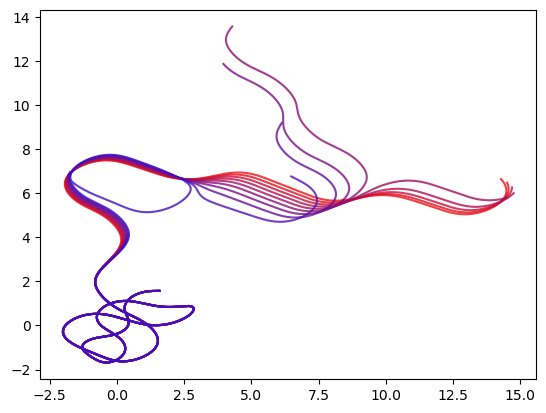

In [132]:
# plotting from various starting positions

offsets = np.arange(0, 0.01, 0.001)
red_2_blue = 15

for d0 in offsets:
    rgb = np.array([242 - (red_2_blue - 15), 15, red_2_blue]) / 255
    states, theta1_vals, theta2_vals, _, _, _, _, = double_pendulum(0.001, 10, d0)
    plt.plot(theta1_vals, theta2_vals, c = rgb, alpha = 0.8, lw = 1.5)
    red_2_blue += 20
    print(f'd0 {d0} plotted')

# plt.legend(['Red: 0'], ['Blue: 0.01'])
plt.show()

In [13]:
# plotting whethter the pendulum flips or not based on input values

def flip_check(theta1_0, theta2_0, dt=0.01, g=9.81, L1=1.0, L2=2.0, m1=1.0, m2=2.0):
    """
    Inputs: 
            dt = timestep
            T = total runtime of simulation
            d0 = top pendulum's displacement from the horizontal (initial separation vector used for Lyapunov calculation)
            g = gravity (9.8 m/s2)
            L1, L2 = lengths of top and bottom pendulums respectively
            m1, m2 = masses of top and bottom pendulums respectively

    Outputs:
            states = array of angular positions and velocities of each pendulum over each timestep
            theta1_vals / theta2_vals = array of angular positions of each pendulum over each timestep
    """

    T1 = 1000 * np.sqrt(L1 / g)
    T2 = 1000 * np.sqrt(L2 / g)
    
    # Initial conditions: [theta1, dtheta1, theta2, dthate2] the initial condition is both pendulum are lifted with half pi angle
    state = np.array([theta1_0, 0.0, theta2_0, 0.0])
    # print(state)

    flip_time = []
    
    theta_derivatives(state, L1, L2, m1, m2)
    states = [state.copy()]
    t = 0
    while t < max(T1,T2):
        state = rk2_step(state, dt, L1, L2, m1, m2)
        if (abs(state[0]) < 2 * np.pi) and (abs(state[2]) < 2 * np.pi):
            states.append(state.copy())
            t += dt
        elif abs(state[0]) >= 2 * np.pi:
            flip_time.append([t,1])
            break
        elif abs(state[2]) >= 2 * np.pi:
            flip_time.append([t,2])
            break
        
    states = np.array(states)

    return flip_time, states

# theta1_inputs = np.arange(-np.pi / 2, np.pi / 2, 0.01)
# theta2_inputs = np.arange(-np.pi / 2, np.pi / 2, 0.01)


# theta1_inputs = np.arange(-np.pi / 2, np.pi / 2, 5)
# theta2_inputs = np.arange(-np.pi / 2, np.pi / 2, 5)

# flip_times = []

# for i in theta1_inputs:
#     for j in theta2_inputs:
#         flip_time, states = flip_check(i, j)
        
#         if flip_time:
#             flip_times.append([flip_time[0][0], flip_time[0][1], i, j])  # [time, pendulum #, theta1_0, theta2_0]
#         else:
#             flip_times.append([0.0, 0, i, j])  # [time=0, no flip, theta1_0, theta2_0]
            
#         if np.isclose(j % (np.pi / 6), 0, atol=1e-3) :
#             print(f'(i,j): ({i},{j}) done')
#     if np.isclose(i % (np.pi / 6), 0, atol=1e-3):
#             print(f'(i,j): ({i},{j}) done')

# print('ALL FINISHED!')

In [11]:
L1, L2, g = 1.0, 2.0, 9.81

def flip_color(flip_times, L1 = 1.0, L2 = 2.0, g = 9.81):

    flip_times = np.array(flip_times)
    
    t1_ratio = np.sqrt(L1 / g)
    t2_ratio = np.sqrt(L2 / g)
    
    t1_time_reference = np.array([t1_ratio, 10 * t1_ratio, 100 * t1_ratio, 1000 * t1_ratio])
    t2_time_reference = np.array([t2_ratio, 10 * t2_ratio, 100 * t2_ratio, 1000 * t2_ratio])
    
    # For top pendulum flips (pendulum 1)
    flipped1 = flip_times[flip_times[:, 1] == 1][:, [0, 2, 3]]
    
    # For bottom pendulum flips (pendulum 2)
    flipped2 = flip_times[flip_times[:, 1] == 2][:, [0, 2, 3]]
    
    # For no flip (pendulum 0)
    no_flip = flip_times[flip_times[:, 1] == 0][:, [0, 2, 3]]
    
    # Filter based on time references (t1_time_reference and t2_time_reference)
    # Black: Values less than or equal to the first time reference
    black = np.vstack([
        flipped1[flipped1[:, 0] <= t1_time_reference[0], 1:3],  # Top flips before or at the first time reference
        flipped2[flipped2[:, 0] <= t2_time_reference[0], 1:3]   # Bottom flips before or at the first time reference
    ])
    
    # Red: Values greater than black and less than or equal to the next time reference
    red = np.vstack([
        flipped1[(flipped1[:, 0] > t1_time_reference[0]) & (flipped1[:, 0] <= t1_time_reference[1]), 1:3],  # Top flips between the first and second time reference
        flipped2[(flipped2[:, 0] > t2_time_reference[0]) & (flipped2[:, 0] <= t2_time_reference[1]), 1:3]   # Bottom flips between the first and second time reference
    ])
    
    # Green: Values greater than red and less than or equal to the next time reference
    green = np.vstack([
        flipped1[(flipped1[:, 0] > t1_time_reference[1]) & (flipped1[:, 0] <= t1_time_reference[2]), 1:3],  # Top flips between the second and third time reference
        flipped2[(flipped2[:, 0] > t2_time_reference[1]) & (flipped2[:, 0] <= t2_time_reference[2]), 1:3]   # Bottom flips between the second and third time reference
    ])
    
    # Blue: Values greater than green and less than or equal to the next time reference
    blue = np.vstack([
        flipped1[(flipped1[:, 0] > t1_time_reference[2]) & (flipped1[:, 0] <= t1_time_reference[3]), 1:3],  # Top flips between the third and fourth time reference
        flipped2[(flipped2[:, 0] > t2_time_reference[2]) & (flipped2[:, 0] <= t2_time_reference[3]), 1:3]   # Bottom flips between the third and fourth time reference
    ])
    
    # White: Values greater than the last time reference (uncapped)
    gray = np.vstack([
        flipped1[flipped1[:, 0] > t1_time_reference[3], 1:3],  # Top flips after the fourth time reference
        flipped2[flipped2[:, 0] > t2_time_reference[3], 1:3]   # Bottom flips after the fourth time reference
    ])

    # White: Values that didn't flip
    white = np.vstack([
        no_flip[:, 1:3]  
    ])
    
    # Print results for debugging
    print(f"flipped1 {flipped1}")
    print(f"flipped2 {flipped2}")
    print(f"no flip {no_flip}")
    print(f"black {black}")
    print(f"red {red}")
    print(f"green {green}")
    print(f"blue {blue}")
    print(f"gray {gray}")
    print(f"white {white}")
    
    return black, red, green, blue, gray, white

In [13]:
theta1_inputs = np.arange(-np.pi / 2, np.pi / 2, 0.05)
theta2_inputs = np.arange(-np.pi / 2, np.pi / 2, 0.05)

flip_times = []

for i in theta1_inputs:
    print(f'Starting i = {i:.2f}')
    for j in theta2_inputs:
        start = time.time()
        flip_time, states = flip_check(i, j)
        print(f"flip_check took {time.time() - start:.2f}s for (i={i:2f}, j={j:2f})")
        
        if flip_time:
            flip_times.append([flip_time[0][0], flip_time[0][1], i, j])  # [time, pendulum #, theta1_0, theta2_0]
        else:
            flip_times.append([0.0, 0, i, j])  # [time=0, no flip, theta1_0, theta2_0]

print('Finished calculating')

black, red, green, blue, gray, white = flip_color(flip_times)

# plotting black
plt.scatter(black[:,0], black[:,1], c = 'black', s = 7, marker = 's')
# plotting red
plt.scatter(red[:,0], red[:,1], c = 'red', s = 7, marker = 's')
# plotting green
plt.scatter(green[:,0], green[:,1], c = 'green', s = 7, marker = 's')
# plotting blue
plt.scatter(blue[:,0], blue[:,1], c = 'blue', s = 7, marker = 's')
# plotting gray
plt.scatter(gray[:,0], gray[:,1], c = 'gray', s = 7, marker = 's')
# plotting white
plt.scatter(white[:,0], white[:,1], c = 'white', s = 7, marker = 's')
plt.show()

Starting i = -1.57


NameError: name 'flip_check' is not defined

Starting i = -3.1416
flip_check took 0.0597s for (i=-3.1416, j=-3.1416)
flip_check took 0.0039s for (i=-3.1416, j=-3.0666)
flip_check took 0.0031s for (i=-3.1416, j=-2.9916)
flip_check took 0.0033s for (i=-3.1416, j=-2.9166)
flip_check took 0.0016s for (i=-3.1416, j=-2.8416)
flip_check took 0.0017s for (i=-3.1416, j=-2.7666)
flip_check took 0.0062s for (i=-3.1416, j=-2.6916)
flip_check took 0.0261s for (i=-3.1416, j=-2.6166)
flip_check took 0.0077s for (i=-3.1416, j=-2.5416)
flip_check took 0.0059s for (i=-3.1416, j=-2.4666)
flip_check took 0.0080s for (i=-3.1416, j=-2.3916)
flip_check took 0.0046s for (i=-3.1416, j=-2.3166)
flip_check took 0.0043s for (i=-3.1416, j=-2.2416)
flip_check took 0.0048s for (i=-3.1416, j=-2.1666)
flip_check took 0.0053s for (i=-3.1416, j=-2.0916)
flip_check took 0.0054s for (i=-3.1416, j=-2.0166)
flip_check took 0.0059s for (i=-3.1416, j=-1.9416)
flip_check took 0.0192s for (i=-3.1416, j=-1.8666)
flip_check took 0.0110s for (i=-3.1416, j=-1.7916)
flip_check

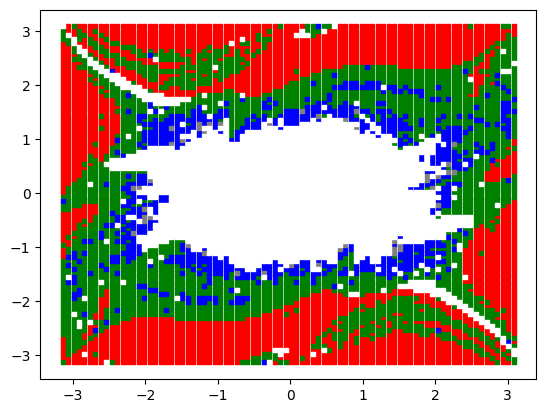

In [29]:
theta1_inputs = np.arange(-np.pi, np.pi, 0.075)
theta2_inputs = np.arange(-np.pi, np.pi, 0.075)

def when_flip(theta1_0, theta2_0):
    flip_times = []
    
    for i in theta1_0:
        print(f'Starting i = {i:.4f}')
        for j in theta2_0:
            start = time.time()
            flip_time, states = flip_check(i, j)
            print(f"flip_check took {time.time() - start:.4f}s for (i={i:.4f}, j={j:.4f})")
            
            if flip_time:
                flip_times.append([flip_time[0][0], flip_time[0][1], i, j])  # [time, pendulum #, theta1_0, theta2_0]
            else:
                flip_times.append([0.0, 0, i, j])  # [time=0, no flip, theta1_0, theta2_0]
    
    print('Finished calculating')
    
    black, red, green, blue, gray, white = flip_color(flip_times)
    
    # plotting black
    plt.scatter(black[:,0], black[:,1], c = 'black', s = 7, marker = 's')
    # plotting red
    plt.scatter(red[:,0], red[:,1], c = 'red', s = 7, marker = 's')
    # plotting green
    plt.scatter(green[:,0], green[:,1], c = 'green', s = 7, marker = 's')
    # plotting blue
    plt.scatter(blue[:,0], blue[:,1], c = 'blue', s = 7, marker = 's')
    # plotting gray
    plt.scatter(gray[:,0], gray[:,1], c = 'gray', s = 7, marker = 's')
    # plotting white
    plt.scatter(white[:,0], white[:,1], c = 'white', s = 7, marker = 's')
    plt.show()

    return flip_times, black, red, green, blue, gray, white

flip_times, black, red, green, blue, gray, white = when_flip(theta1_inputs, theta2_inputs)

flipped1 [[ 5.11900000e+01  0.00000000e+00 -3.14159265e+00]
 [ 3.34000000e+00  0.00000000e+00 -3.12359265e+00]
 [ 2.80000000e+00  0.00000000e+00 -3.06959265e+00]
 ...
 [ 1.33000000e+00  3.13200000e+00 -6.35926536e-02]
 [ 1.43000000e+00  3.13200000e+00 -4.55926536e-02]
 [ 1.66000000e+00  3.13200000e+00 -2.75926536e-02]]
flipped2 [[ 3.22000000e+00  0.00000000e+00 -3.10559265e+00]
 [ 3.09000000e+00  0.00000000e+00 -3.08759265e+00]
 [ 2.31000000e+00  0.00000000e+00 -2.45759265e+00]
 ...
 [ 3.49000000e+00  3.13200000e+00 -2.83559265e+00]
 [ 1.57700000e+01  3.13200000e+00 -2.61959265e+00]
 [ 7.36000000e+00  3.13200000e+00 -9.59265359e-03]]
no flip [[ 0.          0.         -1.32359265]
 [ 0.          0.         -1.30559265]
 [ 0.          0.         -1.26959265]
 ...
 [ 0.          3.132      -3.05159265]
 [ 0.          3.132      -3.03359265]
 [ 0.          3.132      -3.01559265]]
black []
red [[ 0.         -3.06959265]
 [ 0.         -3.05159265]
 [ 0.         -3.03359265]
 ...
 [ 3.132   

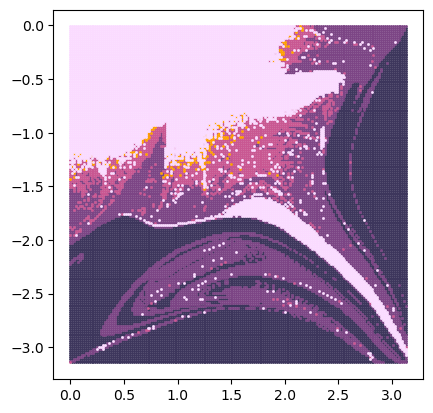

<Figure size 500x500 with 0 Axes>

In [59]:

# flip_times_store = flip_times_ul.copy()
# # print(f'flip times {flip_times_store}')
# flip_times_store = np.array(flip_times_store)

black, red, green, blue, gray, white = flip_color(flip_times_lr)
# plotting black
plt.scatter(black[:,0], black[:,1], c = 'black', s = 1)
# plotting red
plt.scatter(red[:,0], red[:,1], c = '#3d365c', s = 1)
# plotting green
plt.scatter(green[:,0], green[:,1], c = '#7c4585', s = 1)
# plotting blue
plt.scatter(blue[:,0], blue[:,1], c = '#c95792', s = 1)
# plotting gray
plt.scatter(gray[:,0], gray[:,1], c = '#ffa200', s = 1)
# plotting white
plt.scatter(white[:,0], white[:,1], c = '#fadbff', s = 1)
plt.axis('scaled')
plt.figure(figsize=(5, 5))
plt.savefig('flip_graph_lr.png')
plt.draw()

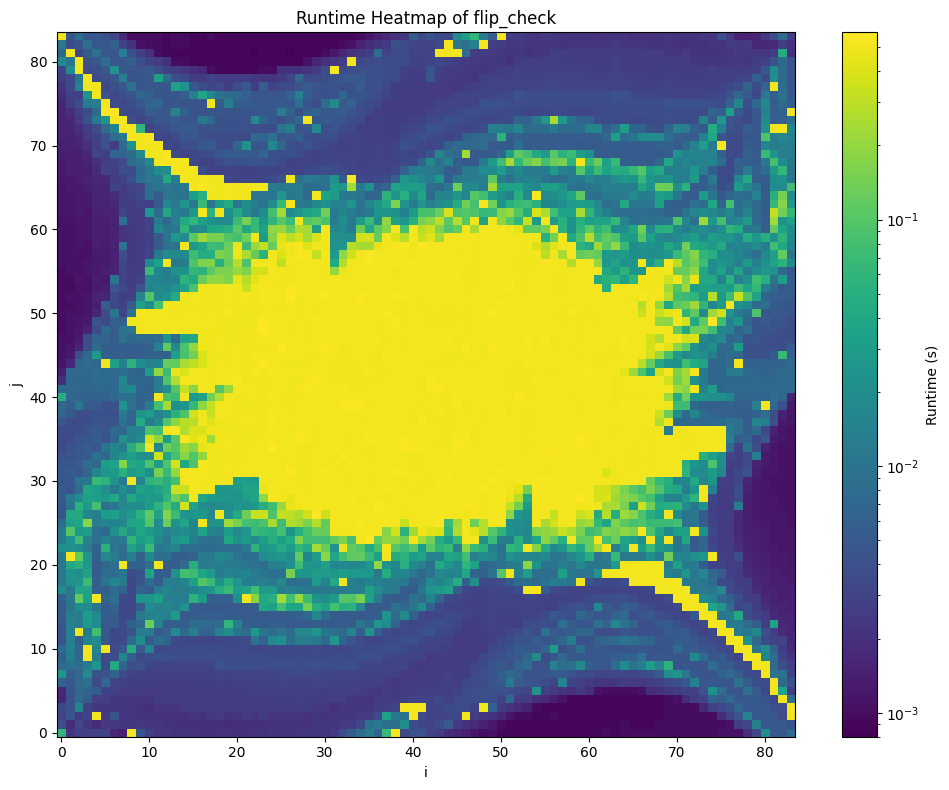

In [37]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.spatial import cKDTree
from collections import defaultdict

# --- Step 1: Parse the text ---
def parse_log(text):
    pattern = r"flip_check took ([\d\.]+)s for \(i=([\d\.\-e]+), j=([\d\.\-e]+)\)"
    data = [(float(i), float(j), float(t)) for t, i, j in re.findall(pattern, text)]
    return data

# --- Step 2: Build a grid of values ---
def build_grid(data):
    points = [(i, j) for i, j, _ in data]
    runtimes = [t for _, _, t in data]
    
    i_vals = sorted(set(i for i, _, _ in data))
    j_vals = sorted(set(j for _, j, _ in data))
    
    i_to_idx = {val: idx for idx, val in enumerate(i_vals)}
    j_to_idx = {val: idx for idx, val in enumerate(j_vals)}
    
    grid = np.full((len(i_vals), len(j_vals)), np.nan)
    
    for i, j, t in data:
        grid[i_to_idx[i], j_to_idx[j]] = t
    
    return grid, i_vals, j_vals

# --- Step 3: Smooth outliers (values > 100) ---
def replace_outliers(grid):
    padded = np.pad(grid, 1, constant_values=np.nan)
    for x in range(1, padded.shape[0]-1):
        for y in range(1, padded.shape[1]-1):
            val = padded[x, y]
            if val > 100:
                neighbors = padded[x-1:x+2, y-1:y+2].flatten()
                neighbors = neighbors[~np.isnan(neighbors)]
                neighbors = neighbors[neighbors <= 100]
                if len(neighbors):
                    padded[x, y] = np.mean(neighbors)
    return padded[1:-1, 1:-1]

# --- Step 4: Plotting ---
def plot_heatmap(grid, i_vals, j_vals):
    plt.figure(figsize=(10, 8))
    plt.imshow(grid, origin='lower', aspect='auto', cmap='viridis', norm=LogNorm(vmin=np.nanmin(grid[grid > 0]), vmax=np.nanmax(grid)))
    plt.colorbar(label="Runtime (s)")
    plt.xlabel("i")
    plt.ylabel("j")
    plt.title("Runtime Heatmap of flip_check")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# --- Load and run ---
# Replace this with your actual multiline string
with open("run_times_data.txt", "r") as f:
    log_data = f.read()

parsed_data = parse_log(log_data)
grid, i_vals, j_vals = build_grid(parsed_data)
grid = grid.T
grid_clean = replace_outliers(grid)
plot_heatmap(grid_clean, i_vals, j_vals)


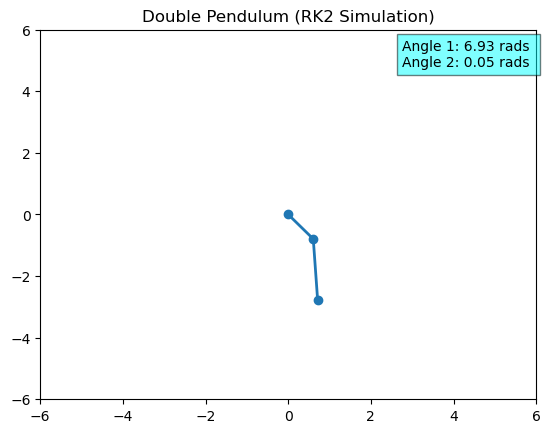

In [111]:
# Animation
fig, ax = plt.subplots()
ax.set_xlim(-2 * (L1 + L2), 2 * (L1 + L2))
ax.set_ylim(-2 * (L1 + L2), 2 * (L1 + L2))
line, = ax.plot([], [], 'o-', lw=2)
angle_text = ax.text(0.73, 0.90, '', transform=ax.transAxes, bbox=dict(facecolor='cyan', alpha=0.5))

def animate(i):
    line.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    angle_text.set_text(
f"""Angle 1: {(theta1_vals[i]):.2f} rads 
Angle 2: {(theta2_vals[i]):.2f} rads""")

    return line, angle_text


writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)

ani = animation.FuncAnimation(fig, animate, frames=len(x1), interval=dt*1000, blit=True).save('pendulum_vid1.mp4', writer='ffmpeg')


plt.title("Double Pendulum (RK2 Simulation)")
plt.show()

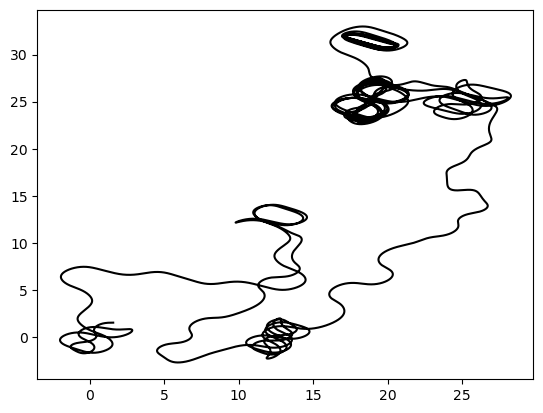

In [66]:
# color = np.array(['red', 'orange', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'magenta', 'pink'])
# color_tile = np.tile(color, int(np.ceil(len(theta1_vals) / len(color))))
# colors = np.delete(color_tile, np.arange(len(theta1_vals), len(color_tile), 1))


# plt.plot(theta1_vals % 2*np.pi, theta2_vals % 2*np.pi, c = 'red', label = 'mod 2pi')
plt.plot(theta1_vals, theta2_vals, c = 'black', label = 'no mod')

# for fun
# color = np.array(['red', 'orange', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'magenta', 'pink'])
# color_tile = np.tile(color, int(np.ceil(len(theta1_vals) / len(color))))
# colors = np.delete(color_tile, np.arange(len(theta1_vals), len(color_tile), 1))
# plt.scatter(theta1_vals, theta2_vals, c = colors, label = 'angle1 vs angle 2 but rainbow')
# plt.plot(np.unwrap(theta1_vals), np.unwrap(theta2_vals), c = 'yellow', label = 'unwrap')

# plt.legend()
plt.show()